In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.dates as mdates

In [40]:
Location_1 = pd.read_csv(r'sfcFluxes_AU-DaP_2010-2013.csv',parse_dates=[0],index_col=0,sep=';')

In [41]:
Location_1

,G,H,LE
TIMESTAMP,,,
01.01.2010 00:00,-17.0,-8.34054,15.412100
01.01.2010 00:30,-17.0,-8.31351,15.390100
01.01.2010 01:00,-17.0,-8.20652,15.342500
01.01.2010 01:30,-14.0,3.00000,7.000000
01.01.2010 02:00,-14.0,-2.00000,7.000000
...,...,...,...
31.12.2013 21:30,NaN,-9.06667,0.866667
31.12.2013 22:00,NaN,-9.13333,0.866667
31.12.2013 22:30,NaN,-12.33330,0.533333


In [42]:
Location_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70128 entries, 01.01.2010 00:00 to 31.12.2013 23:30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       62366 non-null  float64
 1   H       70128 non-null  float64
 2   LE      70128 non-null  float64
dtypes: float64(3)
memory usage: 2.1+ MB


In [43]:
Location_1.fillna(Location_1.mean(), inplace=True)

In [44]:
print(Location_1.isnull().sum())  # Shows the count of NaN values per column


G     0
H     0
LE    0
dtype: int64


In [45]:
Location_2 = pd.read_csv(r'sfcFluxes_DE-Tha_2010-2013.csv',parse_dates=[0],index_col=0,sep=';')

In [46]:
Location_2

,G,H,LE
TIMESTAMP,,,
01.01.2010 00:00,-5.67742,10.4406,1.59889
01.01.2010 00:30,-5.65485,-21.2043,5.42113
01.01.2010 01:00,-5.68737,-20.1123,5.63966
01.01.2010 01:30,-5.78477,-20.1123,5.63966
01.01.2010 02:00,-5.85633,-19.5710,5.49844
...,...,...,...
31.12.2013 21:30,-8.17500,-31.4600,-1.23000
31.12.2013 22:00,-8.43500,-55.4300,0.56000
31.12.2013 22:30,-8.48000,-48.3400,-1.26000


In [47]:
Location_3 = pd.read_csv(r'sfcFluxes_GF-Guy_2010-2013.csv',parse_dates=[0],index_col=0,sep=';')

In [48]:
Location_3

,H,LE,Rn
TIMESTAMP,,,
01.01.2010 00:00,-31.1061,25.5394,-31.86
01.01.2010 00:30,-31.1305,25.5213,-49.26
01.01.2010 01:00,-15.0500,3.6400,-41.95
01.01.2010 01:30,-18.9500,9.8700,-26.51
01.01.2010 02:00,-7.9500,2.6200,-41.41
...,...,...,...
31.12.2013 21:30,-12.5800,17.3100,-19.68
31.12.2013 22:00,-30.3800,22.8500,-15.14
31.12.2013 22:30,-31.1500,114.0900,-27.64


In [49]:
Location_4 = pd.read_csv(r'sfcFluxes_IT-Lav_2010-2013.csv',parse_dates=[0],index_col=0,sep=';')

In [50]:
Location_4

,G,H,LE
TIMESTAMP,,,
01.01.2010 00:00,-3.7331,-38.069600,10.33100
01.01.2010 00:30,-3.7282,-27.068200,15.45460
01.01.2010 01:00,-3.7259,-19.897900,11.49070
01.01.2010 01:30,-3.7267,-8.528990,1.28960
01.01.2010 02:00,-3.7233,-39.075500,21.36650
...,...,...,...
31.12.2013 21:30,-7.1753,-0.921203,5.67308
31.12.2013 22:00,-7.2212,0.981605,-7.29325
31.12.2013 22:30,-7.1294,15.219100,24.34120


In [51]:
#Calculation of Missing features of Energy Balance Equation

In [52]:
def missing_features(data):
    '''
    Energy balance equation:
    Rn = LE + G + H
    where, Rn = net radiation
            LE = Latent heat flux
            G = Ground heat flux
            H = sensible heat flux
    '''
    if 'LE' in data and 'G' in data and 'H' in data and 'Rn' not in data:
        data['Rn'] = data['LE'] + data ['G'] + data['H']
    elif 'Rn' in data and 'LE' in data and 'G' in data and 'H' not in data:
        data['H'] = data['Rn'] - data ['G'] - data['H']
    elif 'Rn' in data and 'LE' in data and 'H' in data and 'G' not in data:
        data['G'] = data['Rn'] - data ['LE'] - data['H']
    elif 'Rn' in data and 'G' in data and 'H' in data and 'LE' not in data:
        data['LE'] = data['Rn'] - data ['G'] - data['H']
    else:
        raise ValueError("Insufficient data to compute the missing variable(s)")
    return data

In [53]:
Location_1_netRadiation = missing_features(Location_1)
Location_2_netRadiation = missing_features(Location_2)
Location_3_netRadiation = missing_features(Location_3)
Location_4_netRadiation = missing_features(Location_4)

In [54]:
Location_3_netRadiation

,H,LE,Rn,G
TIMESTAMP,,,,
01.01.2010 00:00,-31.1061,25.5394,-31.86,-26.2933
01.01.2010 00:30,-31.1305,25.5213,-49.26,-43.6508
01.01.2010 01:00,-15.0500,3.6400,-41.95,-30.5400
01.01.2010 01:30,-18.9500,9.8700,-26.51,-17.4300
01.01.2010 02:00,-7.9500,2.6200,-41.41,-36.0800
...,...,...,...,...
31.12.2013 21:30,-12.5800,17.3100,-19.68,-24.4100
31.12.2013 22:00,-30.3800,22.8500,-15.14,-7.6100
31.12.2013 22:30,-31.1500,114.0900,-27.64,-110.5800


#Exercise 1.1

In [55]:
#Calculate the mean diurnal cycle of H, LE and G for each location if given.
# extracting the hour from time frame, and therefore i have to make sure my time column is in timestamps and using as index

Location_1_netRadiation.index = pd.to_datetime(Location_1_netRadiation.index, format="%d.%m.%Y %H:%M")
Location_2_netRadiation.index = pd.to_datetime(Location_2_netRadiation.index, format="%d.%m.%Y %H:%M")
Location_3_netRadiation.index = pd.to_datetime(Location_3_netRadiation.index, format="%d.%m.%Y %H:%M")
Location_4_netRadiation.index = pd.to_datetime(Location_4_netRadiation.index, format="%d.%m.%Y %H:%M")


In [56]:
'''
Even though we used parse_dates=[0] in pd.read_csv(), your timestamps were in "DD.MM.YYYY HH:MM" format,
which pandas did not automatically recognize. The default format is usually "YYYY-MM-DD HH:MM:SS". 
By explicitly specifying format="%d.%m.%Y %H:%M", we ensure correct parsing.

'''

'\nEven though we used parse_dates=[0] in pd.read_csv(), your timestamps were in "DD.MM.YYYY HH:MM" format,\nwhich pandas did not automatically recognize. The default format is usually "YYYY-MM-DD HH:MM:SS". \nBy explicitly specifying format="%d.%m.%Y %H:%M", we ensure correct parsing.\n\n'

In [57]:
print(Location_1_netRadiation.index)

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:30:00',
               '2010-01-01 01:00:00', '2010-01-01 01:30:00',
               '2010-01-01 02:00:00', '2010-01-01 02:30:00',
               '2010-01-01 03:00:00', '2010-01-01 03:30:00',
               '2010-01-01 04:00:00', '2010-01-01 04:30:00',
               ...
               '2013-12-31 19:00:00', '2013-12-31 19:30:00',
               '2013-12-31 20:00:00', '2013-12-31 20:30:00',
               '2013-12-31 21:00:00', '2013-12-31 21:30:00',
               '2013-12-31 22:00:00', '2013-12-31 22:30:00',
               '2013-12-31 23:00:00', '2013-12-31 23:30:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=70128, freq=None)


In [58]:
print(type(Location_1_netRadiation.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [59]:
#Now extracting hours
Location_1_netRadiation['HOUR'] = Location_1_netRadiation.index.hour
Location_2_netRadiation['HOUR'] = Location_2_netRadiation.index.hour
Location_3_netRadiation['HOUR'] = Location_3_netRadiation.index.hour
Location_4_netRadiation['HOUR'] = Location_4_netRadiation.index.hour

In [60]:
Location_1_netRadiation

,G,H,LE,Rn,HOUR
TIMESTAMP,,,,,
2010-01-01 00:00:00,-17.000000,-8.34054,15.412100,-9.928440,0
2010-01-01 00:30:00,-17.000000,-8.31351,15.390100,-9.923410,0
2010-01-01 01:00:00,-17.000000,-8.20652,15.342500,-9.864020,1
2010-01-01 01:30:00,-14.000000,3.00000,7.000000,-4.000000,1
2010-01-01 02:00:00,-14.000000,-2.00000,7.000000,-9.000000,2
...,...,...,...,...,...
2013-12-31 21:30:00,-1.012775,-9.06667,0.866667,-9.212778,21
2013-12-31 22:00:00,-1.012775,-9.13333,0.866667,-9.279438,22
2013-12-31 22:30:00,-1.012775,-12.33330,0.533333,-12.812742,22


In [61]:
Location_2_netRadiation

,G,H,LE,Rn,HOUR
TIMESTAMP,,,,,
2010-01-01 00:00:00,-5.67742,10.4406,1.59889,6.36207,0
2010-01-01 00:30:00,-5.65485,-21.2043,5.42113,-21.43802,0
2010-01-01 01:00:00,-5.68737,-20.1123,5.63966,-20.16001,1
2010-01-01 01:30:00,-5.78477,-20.1123,5.63966,-20.25741,1
2010-01-01 02:00:00,-5.85633,-19.5710,5.49844,-19.92889,2
...,...,...,...,...,...
2013-12-31 21:30:00,-8.17500,-31.4600,-1.23000,-40.86500,21
2013-12-31 22:00:00,-8.43500,-55.4300,0.56000,-63.30500,22
2013-12-31 22:30:00,-8.48000,-48.3400,-1.26000,-58.08000,22


In [62]:
Location_3_netRadiation

,H,LE,Rn,G,HOUR
TIMESTAMP,,,,,
2010-01-01 00:00:00,-31.1061,25.5394,-31.86,-26.2933,0
2010-01-01 00:30:00,-31.1305,25.5213,-49.26,-43.6508,0
2010-01-01 01:00:00,-15.0500,3.6400,-41.95,-30.5400,1
2010-01-01 01:30:00,-18.9500,9.8700,-26.51,-17.4300,1
2010-01-01 02:00:00,-7.9500,2.6200,-41.41,-36.0800,2
...,...,...,...,...,...
2013-12-31 21:30:00,-12.5800,17.3100,-19.68,-24.4100,21
2013-12-31 22:00:00,-30.3800,22.8500,-15.14,-7.6100,22
2013-12-31 22:30:00,-31.1500,114.0900,-27.64,-110.5800,22


In [63]:
Location_4_netRadiation

,G,H,LE,Rn,HOUR
TIMESTAMP,,,,,
2010-01-01 00:00:00,-3.7331,-38.069600,10.33100,-31.471700,0
2010-01-01 00:30:00,-3.7282,-27.068200,15.45460,-15.341800,0
2010-01-01 01:00:00,-3.7259,-19.897900,11.49070,-12.133100,1
2010-01-01 01:30:00,-3.7267,-8.528990,1.28960,-10.966090,1
2010-01-01 02:00:00,-3.7233,-39.075500,21.36650,-21.432300,2
...,...,...,...,...,...
2013-12-31 21:30:00,-7.1753,-0.921203,5.67308,-2.423423,21
2013-12-31 22:00:00,-7.2212,0.981605,-7.29325,-13.532845,22
2013-12-31 22:30:00,-7.1294,15.219100,24.34120,32.430900,22


In [66]:
MD_cycle_Location_1_netRadiation = Location_1_netRadiation.groupby('HOUR').mean()
MD_cycle_Location_2_netRadiation = Location_2_netRadiation.groupby('HOUR').mean()
MD_cycle_Location_3_netRadiation = Location_3_netRadiation.groupby('HOUR').mean()
MD_cycle_Location_4_netRadiation = Location_4_netRadiation.groupby('HOUR').mean()


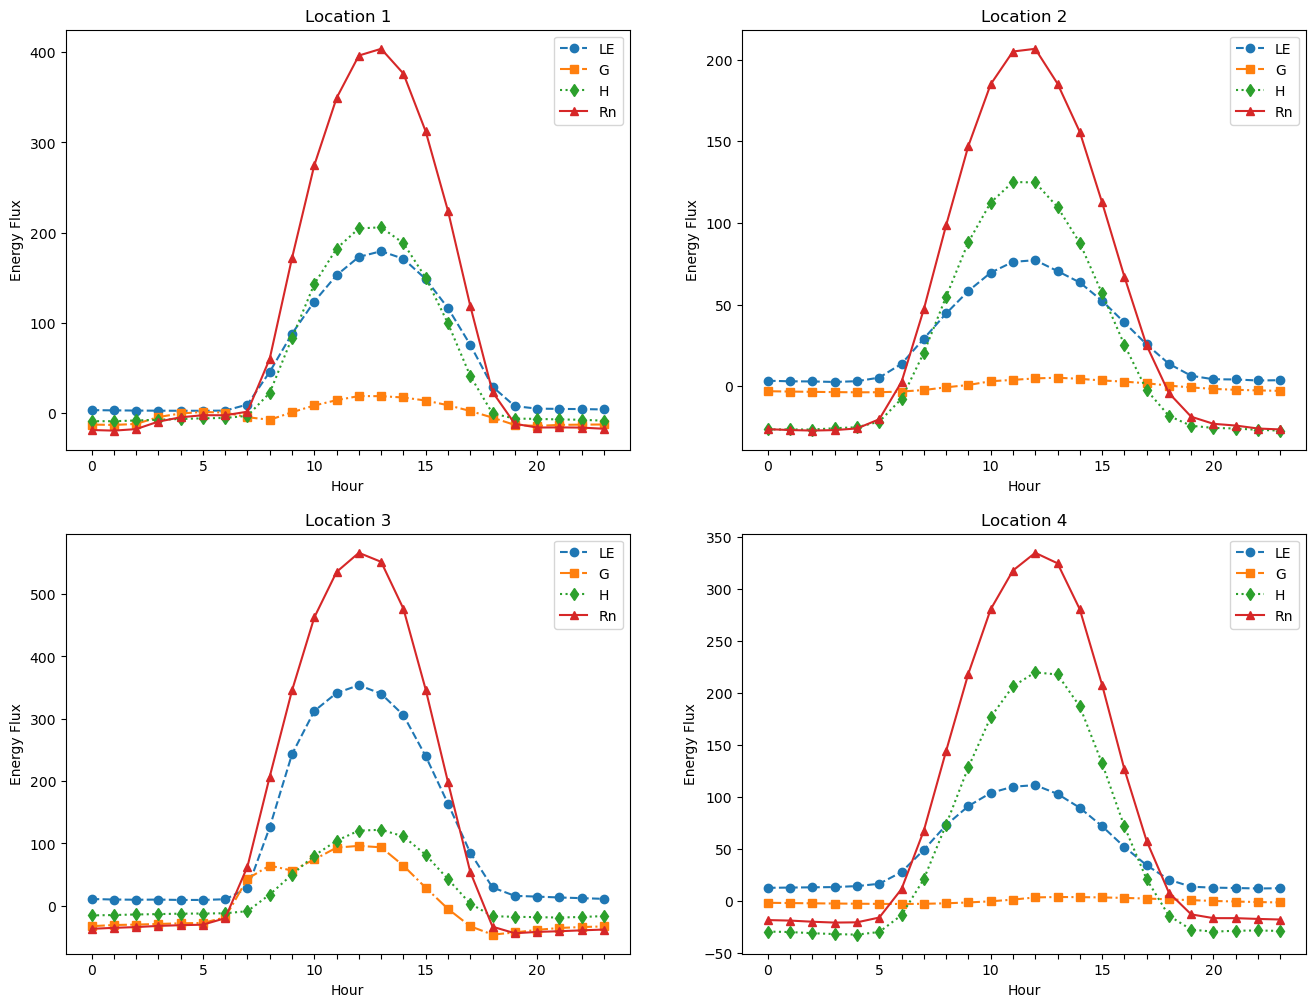

In [84]:
#now plotting
fig,ax = plt.subplots(2,2,figsize=(16, 12))
# Extract hour values from index
hours = MD_cycle_Location_1_netRadiation.index
# Define tick positions (every hour)
tick_positions = hours
# Define tick labels (show label every 5 hours)
tick_labels = [str(h) if h % 5 == 0 else "" for h in hours]

ax[0,0].plot(MD_cycle_Location_1_netRadiation.index, MD_cycle_Location_1_netRadiation['LE'], label="LE", linestyle="--", marker="o")
ax[0,0].plot(MD_cycle_Location_1_netRadiation.index, MD_cycle_Location_1_netRadiation['G'], label="G", linestyle="-.", marker="s")
ax[0,0].plot(MD_cycle_Location_1_netRadiation.index, MD_cycle_Location_1_netRadiation['H'], label="H", linestyle=":", marker="d")
ax[0,0].plot(MD_cycle_Location_1_netRadiation.index, MD_cycle_Location_1_netRadiation['Rn'], label="Rn", linestyle="-", marker="^")
ax[0,0].set_title('Location 1')  # Set title for each subplot
ax[0,0].set_xlabel("Hour")
ax[0,0].set_ylabel("Energy Flux")
ax[0,0].legend()

# Set x-axis tick positions and labels
ax[0, 0].set_xticks(tick_positions)
ax[0, 0].set_xticklabels(tick_labels)

ax[0,1].plot(MD_cycle_Location_2_netRadiation.index, MD_cycle_Location_2_netRadiation['LE'], label="LE", linestyle="--", marker="o")
ax[0,1].plot(MD_cycle_Location_2_netRadiation.index, MD_cycle_Location_2_netRadiation['G'], label="G", linestyle="-.", marker="s")
ax[0,1].plot(MD_cycle_Location_2_netRadiation.index, MD_cycle_Location_2_netRadiation['H'], label="H", linestyle=":", marker="d")
ax[0,1].plot(MD_cycle_Location_2_netRadiation.index, MD_cycle_Location_2_netRadiation['Rn'], label="Rn", linestyle="-", marker="^")
ax[0,1].set_title('Location 2')  # Set title for each subplot
ax[0,1].set_xlabel("Hour")
ax[0,1].set_ylabel("Energy Flux")
ax[0,1].legend()

# Set x-axis tick positions and labels
ax[0,1].set_xticks(tick_positions)
ax[0,1].set_xticklabels(tick_labels)

ax[1,0].plot(MD_cycle_Location_3_netRadiation.index, MD_cycle_Location_3_netRadiation['LE'], label="LE", linestyle="--", marker="o")
ax[1,0].plot(MD_cycle_Location_3_netRadiation.index, MD_cycle_Location_3_netRadiation['G'], label="G", linestyle="-.", marker="s")
ax[1,0].plot(MD_cycle_Location_3_netRadiation.index, MD_cycle_Location_3_netRadiation['H'], label="H", linestyle=":", marker="d")
ax[1,0].plot(MD_cycle_Location_3_netRadiation.index, MD_cycle_Location_3_netRadiation['Rn'], label="Rn", linestyle="-", marker="^")
ax[1,0].set_title('Location 3')  # Set title for each subplot
ax[1,0].set_xlabel("Hour")
ax[1,0].set_ylabel("Energy Flux")
ax[1,0].legend()
ax[1,0].set_xticks(tick_positions)
ax[1,0].set_xticklabels(tick_labels)

ax[1,1].plot(MD_cycle_Location_4_netRadiation.index, MD_cycle_Location_4_netRadiation['LE'], label="LE", linestyle="--", marker="o")
ax[1,1].plot(MD_cycle_Location_4_netRadiation.index, MD_cycle_Location_4_netRadiation['G'], label="G", linestyle="-.", marker="s")
ax[1,1].plot(MD_cycle_Location_4_netRadiation.index, MD_cycle_Location_4_netRadiation['H'], label="H", linestyle=":", marker="d")
ax[1,1].plot(MD_cycle_Location_4_netRadiation.index, MD_cycle_Location_4_netRadiation['Rn'], label="Rn", linestyle="-", marker="^")
ax[1,1].set_title('Location 4')  # Set title for each subplot
ax[1,1].set_xlabel("Hour")
ax[1,1].set_ylabel("Energy Flux")
ax[1,1].legend()
# Set x-axis tick positions and labels
ax[1,1].set_xticks(tick_positions)
ax[1,1].set_xticklabels(tick_labels)


plt.show()